# Extração

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nome_do_arquivo_json = '../dados/TelecomX_Data.json'

try:
    df_telecom = pd.read_json(nome_do_arquivo_json, lines=False)

    print("5 primeiras linhas do seu DataFrame:")
    print(df_telecom.head())

    print("\nInformações gerais do DataFrame:")
    print(df_telecom.info())

except FileNotFoundError:
    print(f"O arquivo '{nome_do_arquivo_json}' não foi encontrado")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo JSON: {e}")

5 primeiras linhas do seu DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'F

# Transformação

### Conhecendo o dataset

In [ ]:
print("\nNomes das Colunas:")
print(df_telecom.columns)

print("\nTipos de Dados de Cada Coluna:")
print(df_telecom.dtypes)

print("\nPrimeiras 5 linhas do DataFrame (para visualizar os dados):")
print(df_telecom.head())

print("\nConsultando o Dicionário de Dados:")
print("customerID: número de identificação único de cada cliente")
print("Churn: se o cliente deixou ou não a empresa")
print("gender: gênero (masculino e feminino)")
print("SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos")
print("Partner: se o cliente possui ou não um parceiro ou parceira")
print("Dependents: se o cliente possui ou não dependentes")
print("tenure: meses de contrato do cliente")
print("PhoneService: assinatura de serviço telefônico")
print("MultipleLines: assinatura de mais de uma linha de telefone")
print("InternetService: assinatura de um provedor internet")
print("OnlineSecurity: assinatura adicional de segurança online")
print("OnlineBackup: assinatura adicional de backup online")
print("DeviceProtection: assinatura adicional de proteção no dispositivo")
print("TechSupport: assinatura adicional de suporte técnico, menos tempo de espera")
print("StreamingTV: assinatura de TV a cabo")
print("StreamingMovies: assinatura de streaming de filmes")
print("Contract: tipo de contrato")
print("PaperlessBilling: se o cliente prefere receber online a fatura")
print("PaymentMethod: forma de pagamento")
print("Charges.Monthly: total de todos os serviços do cliente por mês")
print("Charges.Total: total gasto pelo cliente")


Nomes das Colunas:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Tipos de Dados de Cada Coluna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Primeiras 5 linhas do DataFrame (para visualizar os dados):
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'

### Verificando inconsistências nos dados

In [3]:
print("\n--- Verificação de Valores Ausentes ---")

valores_ausentes = df_telecom.isnull().sum()
print(valores_ausentes[valores_ausentes > 0])

if valores_ausentes.sum() == 0:
    print("Não há valores ausentes no DataFrame")
else:
    print(f"\nTotal de valores ausentes no DataFrame: {valores_ausentes.sum()}")

print("\nTipo de dado da coluna 'customer':", df_telecom['customer'].dtype)
print("Tipo de dado da coluna 'phone':", df_telecom['phone'].dtype)
print("Tipo de dado da coluna 'internet':", df_telecom['internet'].dtype)
print("Tipo de dado da coluna 'account':", df_telecom['account'].dtype)

print("\nExemplo de um dicionário da coluna 'customer':")
print(df_telecom['customer'].iloc[0])

print("\nExemplo de um dicionário da coluna 'account':")
print(df_telecom['account'].iloc[0])


--- Verificação de Valores Ausentes ---
Series([], dtype: int64)
Não há valores ausentes no DataFrame

Tipo de dado da coluna 'customer': object
Tipo de dado da coluna 'phone': object
Tipo de dado da coluna 'internet': object
Tipo de dado da coluna 'account': object

Exemplo de um dicionário da coluna 'customer':
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}

Exemplo de um dicionário da coluna 'account':
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


### Tratando as inconsistências

In [4]:
print("\nDesaninhando colunas de dicionários sequencialmente e removendo as originais")

if 'customer' in df_telecom.columns:
    df_customer_details = df_telecom['customer'].apply(pd.Series)
    df_telecom = pd.concat([df_telecom.drop(columns=['customer']), df_customer_details], axis=1)
    print("Coluna 'customer' desaninhada e removida a original.")
else:
    print("Coluna 'customer' não existe")

if 'phone' in df_telecom.columns:
    df_phone_details = df_telecom['phone'].apply(pd.Series)
    df_telecom = pd.concat([df_telecom.drop(columns=['phone']), df_phone_details], axis=1)
    print("Coluna 'phone' desaninhada e removida a original.")
else:
    print("Coluna 'phone' não existe")

if 'internet' in df_telecom.columns:
    df_internet_details = df_telecom['internet'].apply(pd.Series)
    df_telecom = pd.concat([df_telecom.drop(columns=['internet']), df_internet_details], axis=1)
    print("Coluna 'internet' desaninhada e removida a original.")
else:
    print("Coluna 'internet' não existe")

if 'account' in df_telecom.columns:
    df_account_details = df_telecom['account'].apply(pd.Series)

    if 'Charges' in df_account_details.columns and not df_account_details['Charges'].empty:
        if isinstance(df_account_details['Charges'].iloc[0], dict):
            df_charges_details = df_account_details['Charges'].apply(pd.Series)

            if 'Monthly' in df_charges_details.columns:
                df_charges_details.rename(columns={'Monthly': 'Charges.Monthly'}, inplace=True)
            if 'Total' in df_charges_details.columns:
                df_charges_details.rename(columns={'Total': 'Charges.Total'}, inplace=True)

            df_telecom = pd.concat([df_telecom, df_charges_details], axis=1)
            df_account_details = df_account_details.drop(columns=['Charges'])
            print("Sub-coluna 'Charges' dentro de 'account' desaninhada e renomeada")
        else:
            print("'Charges' na coluna 'account' não é um dicionário ou está vazia na primeira linha")
    else:
        print("Atenção: Coluna 'Charges' não encontrada dentro de 'account' ou está vazia.")

    df_telecom = pd.concat([df_telecom.drop(columns=['account']), df_account_details], axis=1)
    print("Coluna 'account' e suas sub-colunas restantes desaninhadas e removida a original.")
else:
    print("Coluna 'account' não existe")


print("\nDataFrame após desaninhamento:")
df_telecom.info()
print("\nPrimeiras linhas do DataFrame após desaninhamento e renomeação:")
print(df_telecom.head())

print("\nVerificação e Correção de Tipos de Dados:")

colunas_para_numerico = ['Charges.Total', 'Charges.Monthly', 'tenure']

for col in colunas_para_numerico:
    if col in df_telecom.columns:
        print(f"Convertendo coluna '{col}' para tipo numérico...")
        df_telecom[col] = pd.to_numeric(df_telecom[col], errors='coerce')
        print(f"Tipo de '{col}' agora: {df_telecom[col].dtype}")
    else:
        print(f"Erro: Coluna '{col}' não encontrada para conversão numérica")

print("\nRe-verificação de Valores Ausentes após conversão:")
valores_ausentes_pos_conversao = df_telecom.isnull().sum()
print(valores_ausentes_pos_conversao[valores_ausentes_pos_conversao > 0])

if 'Charges.Total' in df_telecom.columns and df_telecom['Charges.Total'].isnull().sum() > 0:
    linhas_removidas_charges_total = df_telecom['Charges.Total'].isnull().sum()
    df_telecom.dropna(subset=['Charges.Total'], inplace=True)
    print(f"Removidas {linhas_removidas_charges_total} linhas com valores ausentes em 'Charges.Total'.")
    print(f"Novo número de linhas no DataFrame: {len(df_telecom)}")

if 'Charges.Monthly' in df_telecom.columns and df_telecom['Charges.Monthly'].isnull().sum() > 0:
    print(f"Atenção: Existem {df_telecom['Charges.Monthly'].isnull().sum()} valores ausentes em 'Charges.Monthly'.")

print("\nVerificação de Inconsistências em Colunas Categóricas:")
categorical_cols_to_check = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_cols_to_check:
    if col in df_telecom.columns:
        print(f"\nValores únicos na coluna '{col}':")
        print(df_telecom[col].astype(str).str.lower().unique())
    else:
        print(f"Coluna '{col}' não encontrada após desaninhamento.")

if 'SeniorCitizen' in df_telecom.columns:
    print("\nCorrigindo tipo de 'SeniorCitizen' para numérico (0 ou 1):")
    df_telecom['SeniorCitizen'] = pd.to_numeric(df_telecom['SeniorCitizen'], errors='coerce').fillna(0).astype(int)
    print(f"Tipo de 'SeniorCitizen' agora: {df_telecom['SeniorCitizen'].dtype}")
    print(f"Valores únicos de 'SeniorCitizen' após correção: {df_telecom['SeniorCitizen'].unique()}")

print("\nRe-verificação de Linhas Duplicadas:")
num_duplicadas_pos_limpeza = df_telecom.duplicated().sum()
if num_duplicadas_pos_limpeza > 0:
    print(f"Número de linhas completamente duplicadas encontradas: {num_duplicadas_pos_limpeza}")
    df_telecom.drop_duplicates(inplace=True)
    print(f"Linhas duplicadas removidas. Novo número de linhas: {len(df_telecom)}")
else:
    print("Não há linhas completamente duplicadas detectadas no DataFrame")


print("\n--- DataFrame após todas as correções:")
df_telecom.info()
print("\nPrimeiras linhas do DataFrame após as correções:")
print(df_telecom.head())


Desaninhando colunas de dicionários sequencialmente e removendo as originais
Coluna 'customer' desaninhada e removida a original.
Coluna 'phone' desaninhada e removida a original.
Coluna 'internet' desaninhada e removida a original.
Sub-coluna 'Charges' dentro de 'account' desaninhada e renomeada
Coluna 'account' e suas sub-colunas restantes desaninhadas e removida a original.

DataFrame após desaninhamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   Multi

### Coluna contas diárias

In [5]:
print("\nCriando a coluna 'Contas_Diarias':")

if 'Charges.Monthly' in df_telecom.columns and pd.api.types.is_numeric_dtype(df_telecom['Charges.Monthly']):
    df_telecom['Contas_Diarias'] = df_telecom['Charges.Monthly'] / 30
    print("Coluna 'Contas_Diarias' criada com sucesso.")
else:
    print("ERRO: A coluna 'Charges.Monthly' não foi encontrada")

print("\nDataFrame após a criação de 'Contas_Diarias'")
df_telecom.info()
print("\nPrimeiras linhas do DataFrame com a nova coluna:")
print(df_telecom[['customerID', 'Charges.Monthly', 'Contas_Diarias']].head())


Criando a coluna 'Contas_Diarias':
Coluna 'Contas_Diarias' criada com sucesso.

DataFrame após a criação de 'Contas_Diarias'
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int32  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV    

### Padronização e transformação de dados

In [6]:
colunas_binarias_para_mapear = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

print("\nPadronizando colunas binárias para 1 e 0:")
for col in colunas_binarias_para_mapear:
    if col in df_telecom.columns:
        mapeamento = {'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}

        if col == 'Churn':
            df_telecom[col] = df_telecom[col].replace('', 'No') 
            print(f"Tratando possíveis vazios em '{col}' como 'No' antes da conversão.")

        df_telecom[col] = df_telecom[col].map(mapeamento).astype(int)
        print(f"Coluna '{col}' padronizada para 1/0. Novos valores únicos: {df_telecom[col].unique()}")
    else:
        print(f"Coluna '{col}' não encontrada para padronização binária")

colunas_servico_para_padronizar = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

print("\nPadronizando valores 'no service' para 'No':")
for col in colunas_servico_para_padronizar:
    if col in df_telecom.columns:
        df_telecom[col] = df_telecom[col].replace(
            ['No phone service', 'No internet service', 'no phone service', 'no internet service'], 'No'
        )
        print(f"Coluna '{col}' padronizada. Novos valores únicos: {df_telecom[col].astype(str).str.lower().unique()}")
    else:
        print(f"Coluna '{col}' não encontrada para padronização de serviço.")

print("\nRenomeando e traduzindo nomes de colunas:")
novos_nomes_colunas = {
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Meses_Servico',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Custo_Mensal',
    'Charges.Total': 'Custo_Total',
    'Contas_Diarias': 'Custo_Diario',
    'Churn': 'Exclusao_Cliente'
}

df_telecom.rename(columns=novos_nomes_colunas, inplace=True)
print("Nomes de colunas renomeados/traduzidos.")
print("Novas colunas do DataFrame:", df_telecom.columns.tolist())

print("\nTraduzindo valores categóricos restantes:")
if 'Genero' in df_telecom.columns:
    df_telecom['Genero'] = df_telecom['Genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
    print(f"Coluna 'Genero' traduzida. Novos valores únicos: {df_telecom['Genero'].unique()}")

if 'Servico_Internet' in df_telecom.columns:
    df_telecom['Servico_Internet'] = df_telecom['Servico_Internet'].replace({'DSL': 'DSL', 'Fiber optic': 'Fibra Óptica', 'No': 'Não'})
    print(f"Coluna 'Servico_Internet' traduzida. Novos valores únicos: {df_telecom['Servico_Internet'].unique()}")

if 'Contrato' in df_telecom.columns:
    df_telecom['Contrato'] = df_telecom['Contrato'].replace({
        'Month-to-month': 'Mensal',
        'One year': 'Um ano',
        'Two year': 'Dois anos'
    })
    print(f"Coluna 'Contrato' traduzida. Novos valores únicos: {df_telecom['Contrato'].unique()}")

if 'Metodo_Pagamento' in df_telecom.columns:
    df_telecom['Metodo_Pagamento'] = df_telecom['Metodo_Pagamento'].replace({
        'Mailed check': 'Cheque enviado',
        'Electronic check': 'Cheque eletrônico',
        'Bank transfer (automatic)': 'Transferência bancária (automática)',
        'Credit card (automatic)': 'Cartão de crédito (automático)'
    })
    print(f"Coluna 'Metodo_Pagamento' traduzida. Novos valores únicos: {df_telecom['Metodo_Pagamento'].unique()}")

print("\nDataFrame após todas as Padronizações e Transformações:")
df_telecom.info()
print("\nPrimeiras linhas do DataFrame após as padronizações:")
print(df_telecom.head())

print("\nVerificação de valores únicos nas colunas binárias e de serviço:")
for col in ['Parceiro', 'Dependentes', 'Servico_Telefone', 'Fatura_Digital', 'Exclusao_Cliente',
            'Multiplas_Linhas', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
            'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']:
    if col in df_telecom.columns:
        print(f"Coluna '{col}' valores únicos: {df_telecom[col].unique()}")


Padronizando colunas binárias para 1 e 0:
Coluna 'Partner' padronizada para 1/0. Novos valores únicos: [1 0]
Coluna 'Dependents' padronizada para 1/0. Novos valores únicos: [1 0]
Coluna 'PhoneService' padronizada para 1/0. Novos valores únicos: [1 0]
Coluna 'PaperlessBilling' padronizada para 1/0. Novos valores únicos: [1 0]
Tratando possíveis vazios em 'Churn' como 'No' antes da conversão.
Coluna 'Churn' padronizada para 1/0. Novos valores únicos: [0 1]

Padronizando valores 'no service' para 'No':
Coluna 'MultipleLines' padronizada. Novos valores únicos: ['no' 'yes']
Coluna 'OnlineSecurity' padronizada. Novos valores únicos: ['no' 'yes']
Coluna 'OnlineBackup' padronizada. Novos valores únicos: ['yes' 'no']
Coluna 'DeviceProtection' padronizada. Novos valores únicos: ['no' 'yes']
Coluna 'TechSupport' padronizada. Novos valores únicos: ['yes' 'no']
Coluna 'StreamingTV' padronizada. Novos valores únicos: ['yes' 'no']
Coluna 'StreamingMovies' padronizada. Novos valores únicos: ['no' 'ye

# Carga e análise

### Análise descritiva

In [7]:
print("\nResumo Estatístico para Colunas Numéricas:")
desc_numerico = df_telecom.describe()
print(desc_numerico)

print("\nResumo Estatístico para Colunas Categóricas:")
desc_categorico = df_telecom.describe(include='object')
print(desc_categorico)

if 'Meses_Servico' in df_telecom.columns:
    print(f"\nEstatísticas detalhadas para 'Meses_Servico' (tenure):")
    print(f"Média: {df_telecom['Meses_Servico'].mean():.2f}")
    print(f"Mediana: {df_telecom['Meses_Servico'].median():.2f}")
    print(f"Desvio Padrão: {df_telecom['Meses_Servico'].std():.2f}")
    print(f"Mínimo: {df_telecom['Meses_Servico'].min():.2f}")
    print(f"Máximo: {df_telecom['Meses_Servico'].max():.2f}")
    print(f"Q1 (25%): {df_telecom['Meses_Servico'].quantile(0.25):.2f}")
    print(f"Q3 (75%): {df_telecom['Meses_Servico'].quantile(0.75):.2f}")
else:
    print("Coluna 'Meses_Servico' não encontrada.")

if 'Custo_Mensal' in df_telecom.columns:
    print(f"\nEstatísticas detalhadas para 'Custo_Mensal':")
    print(f"Média: {df_telecom['Custo_Mensal'].mean():.2f}")
    print(f"Mediana: {df_telecom['Custo_Mensal'].median():.2f}")
    print(f"Desvio Padrão: {df_telecom['Custo_Mensal'].std():.2f}")
    print(f"Mínimo: {df_telecom['Custo_Mensal'].min():.2f}")
    print(f"Máximo: {df_telecom['Custo_Mensal'].max():.2f}")
    print(f"Q1 (25%): {df_telecom['Custo_Mensal'].quantile(0.25):.2f}")
    print(f"Q3 (75%): {df_telecom['Custo_Mensal'].quantile(0.75):.2f}")
else:
    print("Coluna 'Custo_Mensal' não encontrada.")

if 'Exclusao_Cliente' in df_telecom.columns:
    print(f"\nEstatísticas para 'Exclusao_Cliente' (0=Não, 1=Sim):")
    print(f"Média (Proporção de Churn): {df_telecom['Exclusao_Cliente'].mean():.4f}")
    print(f"Contagem de 0s (Não): {df_telecom['Exclusao_Cliente'].value_counts()[0] if 0 in df_telecom['Exclusao_Cliente'].value_counts() else 0}")
    print(f"Contagem de 1s (Sim): {df_telecom['Exclusao_Cliente'].value_counts()[1] if 1 in df_telecom['Exclusao_Cliente'].value_counts() else 0}")
    print(f"Porcentagem de Churn: {df_telecom['Exclusao_Cliente'].mean() * 100:.2f}%")
else:
    print("Coluna 'Exclusao_Cliente' não encontrada.")


Resumo Estatístico para Colunas Numéricas:
       Exclusao_Cliente      Idoso     Parceiro  Dependentes  Meses_Servico  \
count       7256.000000  7256.0000  7256.000000  7256.000000    7256.000000   
mean           0.257580     0.1629     0.483600     0.299063      32.395535   
std            0.437332     0.3693     0.499765     0.457879      24.558067   
min            0.000000     0.0000     0.000000     0.000000       1.000000   
25%            0.000000     0.0000     0.000000     0.000000       9.000000   
50%            0.000000     0.0000     0.000000     0.000000      29.000000   
75%            1.000000     0.0000     1.000000     1.000000      55.000000   
max            1.000000     1.0000     1.000000     1.000000      72.000000   

       Servico_Telefone  Custo_Mensal  Custo_Total  Fatura_Digital  \
count       7256.000000   7256.000000  7256.000000     7256.000000   
mean           0.902839     64.755423  2280.634213        0.593716   
std            0.296197     30.125

### Distribuição da evasão


Contagem de Clientes por 'Exclusao_Cliente':
Exclusao_Cliente
0    5387
1    1869
Name: count, dtype: int64

Gerando Gráfico de Barras para a Contagem de Churn:


C:\Users\richa\AppData\Local\Temp\ipykernel_4864\3995373394.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exclusao_Cliente_Label', data=df_temp_plot, palette='viridis')


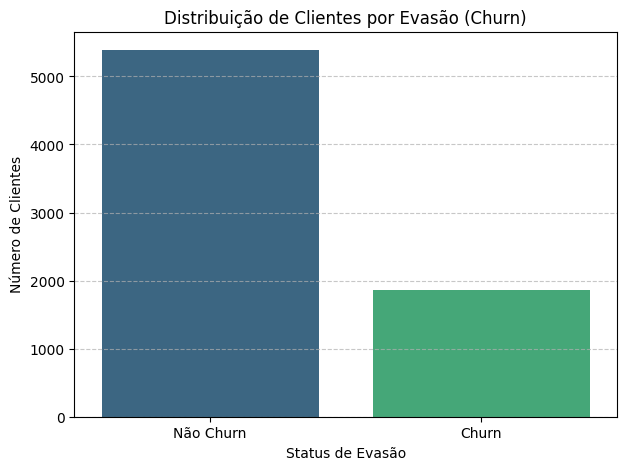

O gráfico de barras mostra o número absoluto de clientes que permaneceram vs. saíram.

Gráfico de Pizza para a Proporção de Churn:


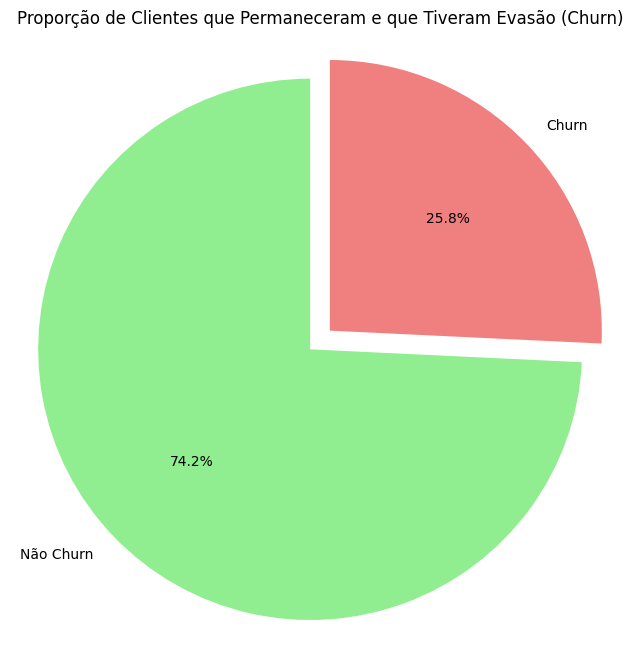

O gráfico de pizza visualiza a porcentagem de clientes que permaneceram e que tiveram churn.


In [8]:
contagem_churn = df_telecom['Exclusao_Cliente'].value_counts()
print("\nContagem de Clientes por 'Exclusao_Cliente':")
print(contagem_churn)

churn_labels = {0: 'Não Churn', 1: 'Churn'}
df_temp_plot = df_telecom.copy()
df_temp_plot['Exclusao_Cliente_Label'] = df_temp_plot['Exclusao_Cliente'].map(churn_labels)

print("\nGerando Gráfico de Barras para a Contagem de Churn:")
plt.figure(figsize=(7, 5))
sns.countplot(x='Exclusao_Cliente_Label', data=df_temp_plot, palette='viridis')
plt.title('Distribuição de Clientes por Evasão (Churn)')
plt.xlabel('Status de Evasão')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("O gráfico de barras mostra o número absoluto de clientes que permaneceram vs. saíram.")

print("\nGráfico de Pizza para a Proporção de Churn:")
porcentagens_churn = df_temp_plot['Exclusao_Cliente_Label'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(porcentagens_churn,
        labels=porcentagens_churn.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightgreen', 'lightcoral'],
        explode=(0, 0.1)
       )
plt.title('Proporção de Clientes que Permaneceram e que Tiveram Evasão (Churn)')
plt.axis('equal')
plt.show()
print("O gráfico de pizza visualiza a porcentagem de clientes que permaneceram e que tiveram churn.")

### Contagem de evasão por variáveis categóricas


Análise para a variável: 'Genero'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Genero                                  
Feminino                  939       2648
Masculino                 930       2739

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Genero                                  
Feminino                26.18      73.82
Masculino               25.35      74.65


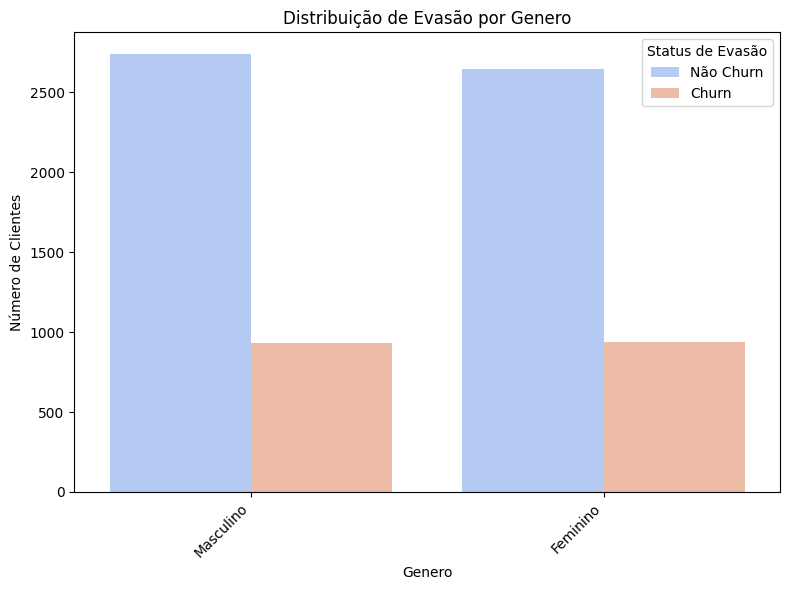

Observações para 'Genero':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Genero'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Idoso'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Idoso                                   
0                        1393       4681
1                         476        706

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Idoso                                   
0                       22.93      77.07
1                       40.27      59.73


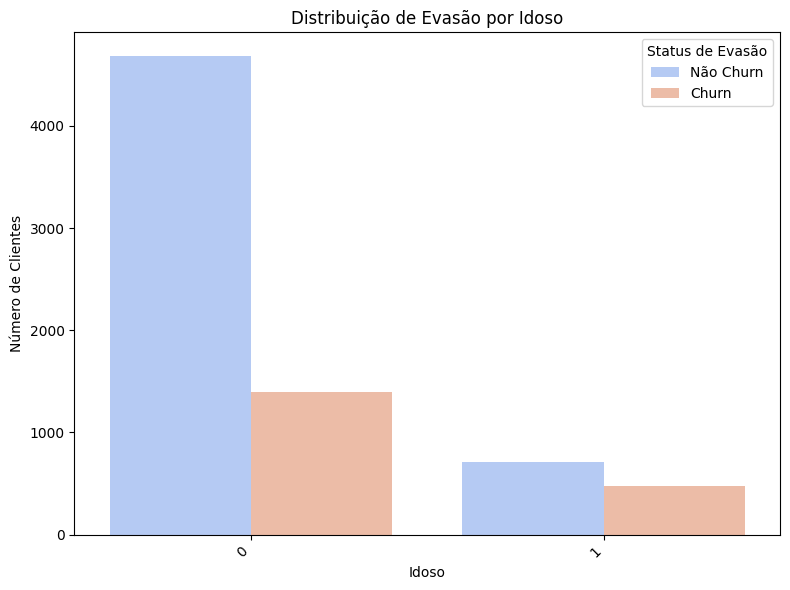

Observações para 'Idoso':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Idoso'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Parceiro'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Parceiro                                
0                        1200       2547
1                         669       2840

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Parceiro                                
0                       32.03      67.97
1                       19.07      80.93


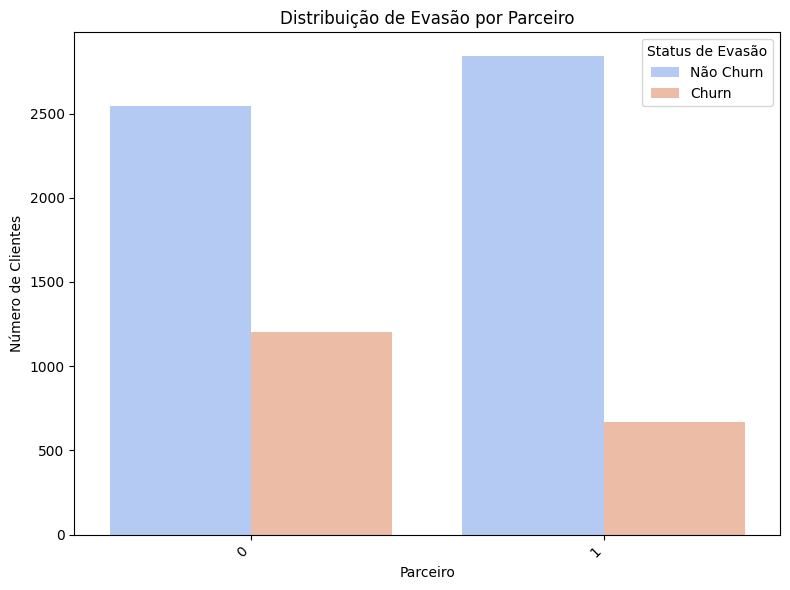

Observações para 'Parceiro':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Parceiro'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Dependentes'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Dependentes                             
0                        1543       3543
1                         326       1844

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Dependentes                             
0                       30.34      69.66
1                       15.02      84.98


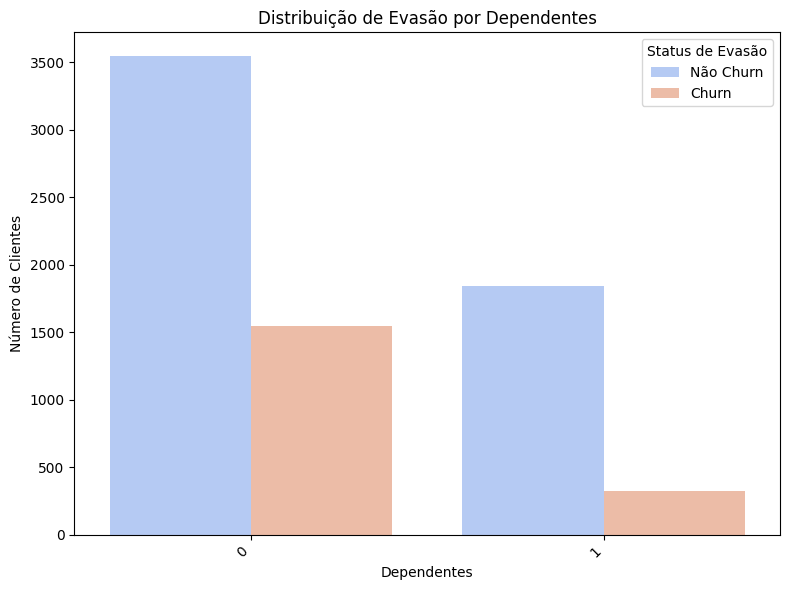

Observações para 'Dependentes':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Dependentes'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Servico_Telefone'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Servico_Telefone                        
0                         170        535
1                        1699       4852

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Servico_Telefone                        
0                       24.11      75.89
1                       25.93      74.07


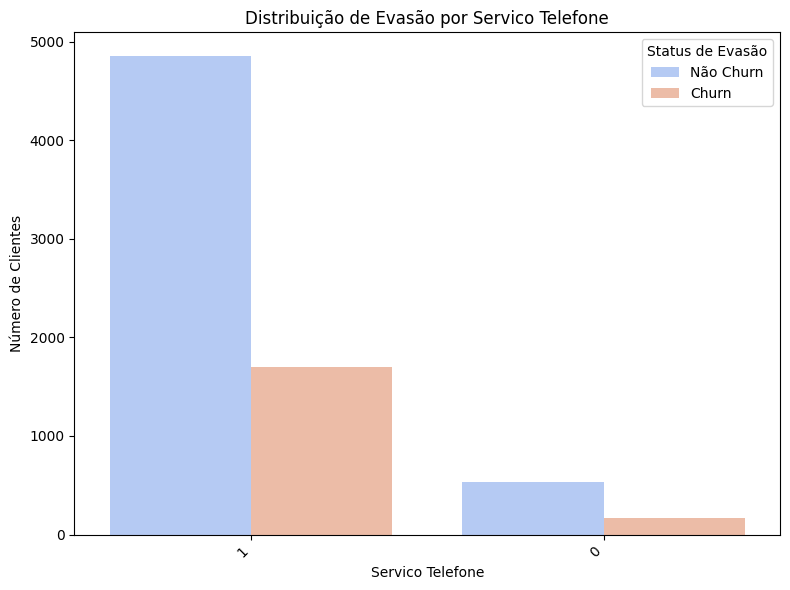

Observações para 'Servico_Telefone':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Servico_Telefone'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Multiplas_Linhas'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Multiplas_Linhas                        
No                       1019       3176
Yes                       850       2211

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Multiplas_Linhas                        
No                      24.29      75.71
Yes                     27.77      72.23


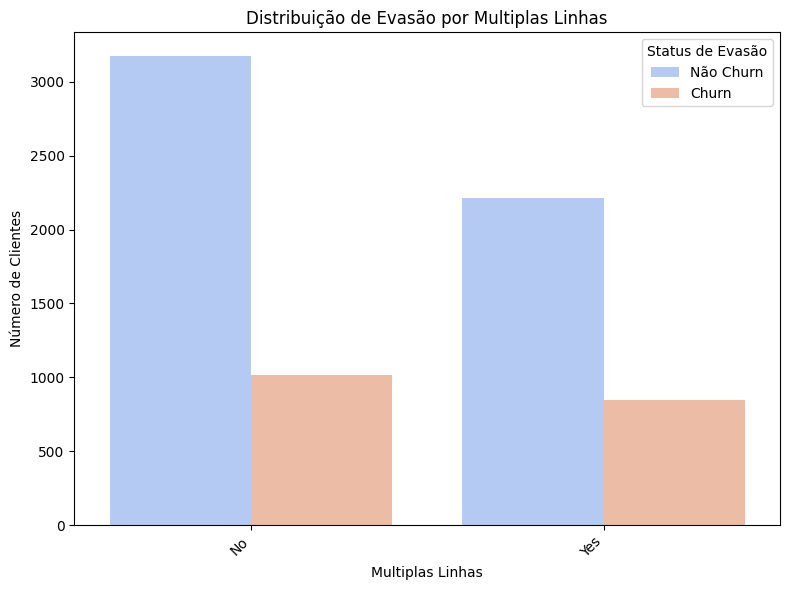

Observações para 'Multiplas_Linhas':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Multiplas_Linhas'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Servico_Internet'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Servico_Internet                        
DSL                       459       2024
Fibra Óptica             1297       1901
Não                       113       1462

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Servico_Internet                        
DSL                     18.49      81.51
Fibra Óptica            40.56      59.44
Não                      7.17      92.83


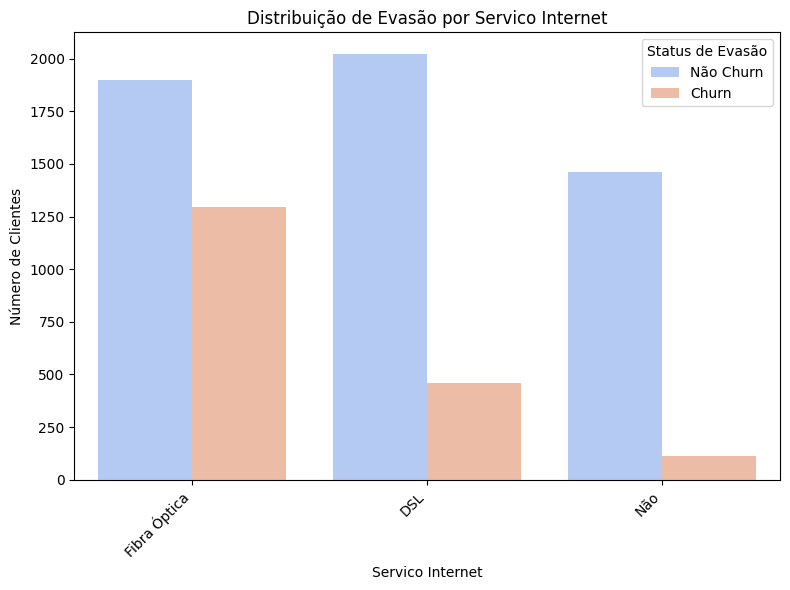

Observações para 'Servico_Internet':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Servico_Internet'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Seguranca_Online'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Seguranca_Online                        
No                       1574       3608
Yes                       295       1779

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Seguranca_Online                        
No                      30.37      69.63
Yes                     14.22      85.78


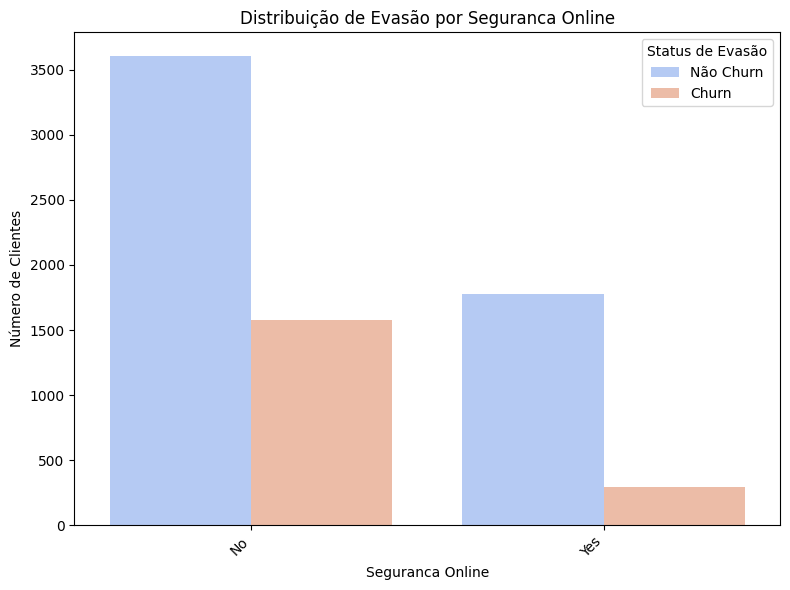

Observações para 'Seguranca_Online':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Seguranca_Online'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Backup_Online'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Backup_Online                           
No                       1346       3410
Yes                       523       1977

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Backup_Online                           
No                      28.30      71.70
Yes                     20.92      79.08


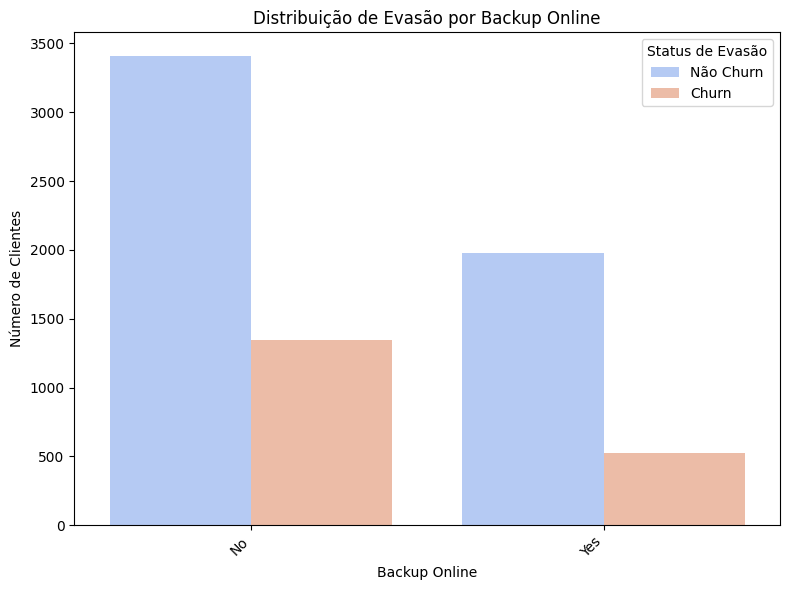

Observações para 'Backup_Online':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Backup_Online'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Protecao_Dispositivo'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Protecao_Dispositivo                    
No                       1324       3445
Yes                       545       1942

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Protecao_Dispositivo                    
No                      27.76      72.24
Yes                     21.91      78.09


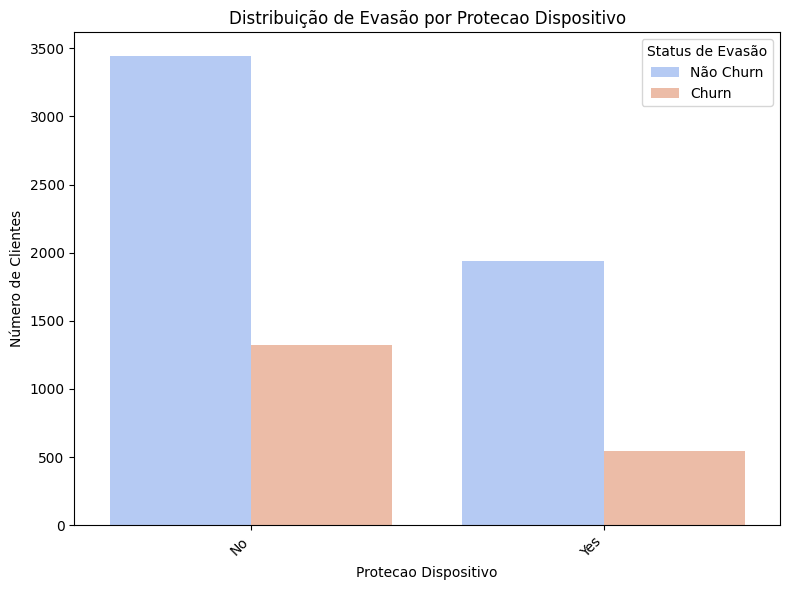

Observações para 'Protecao_Dispositivo':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Protecao_Dispositivo'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Suporte_Tecnico'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Suporte_Tecnico                         
No                       1559       3597
Yes                       310       1790

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Suporte_Tecnico                         
No                      30.24      69.76
Yes                     14.76      85.24


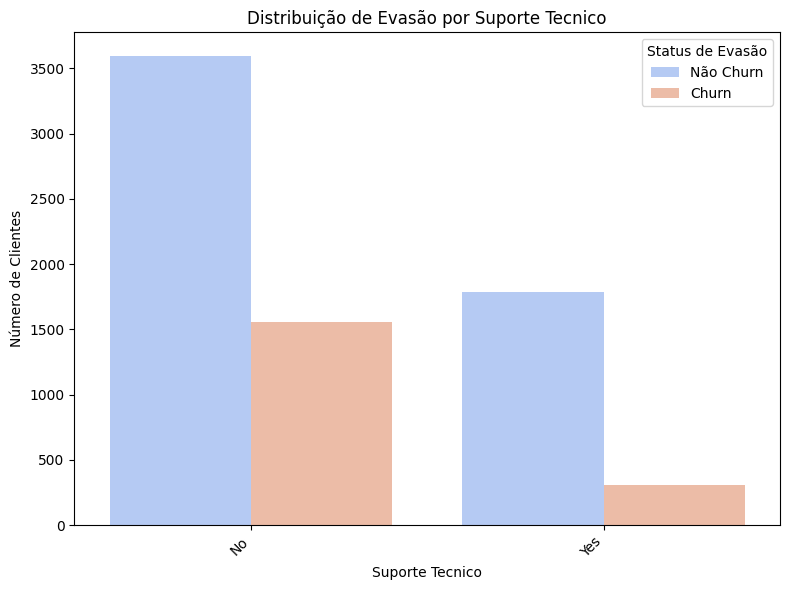

Observações para 'Suporte_Tecnico':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Suporte_Tecnico'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Streaming_TV'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Streaming_TV                            
No                       1055       3415
Yes                       814       1972

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Streaming_TV                            
No                      23.60      76.40
Yes                     29.22      70.78


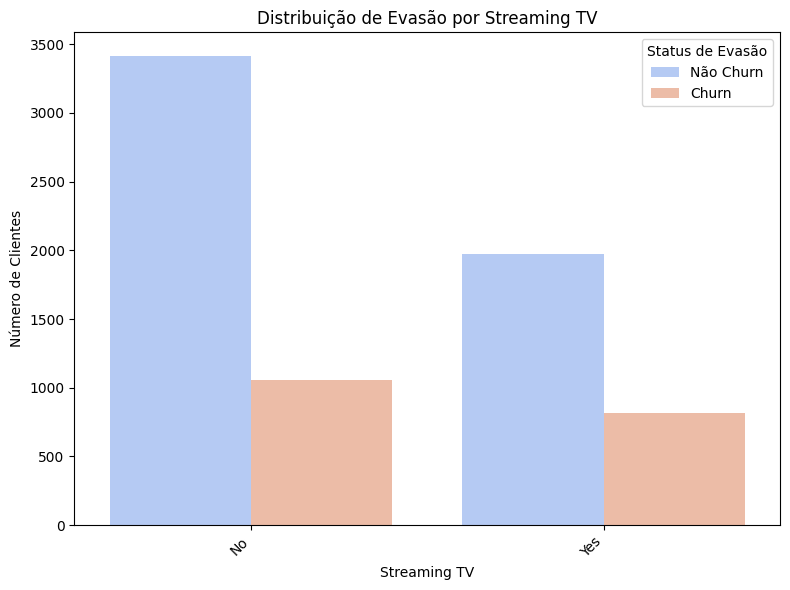

Observações para 'Streaming_TV':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Streaming_TV'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Streaming_Filmes'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Streaming_Filmes                        
No                       1051       3390
Yes                       818       1997

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Streaming_Filmes                        
No                      23.67      76.33
Yes                     29.06      70.94


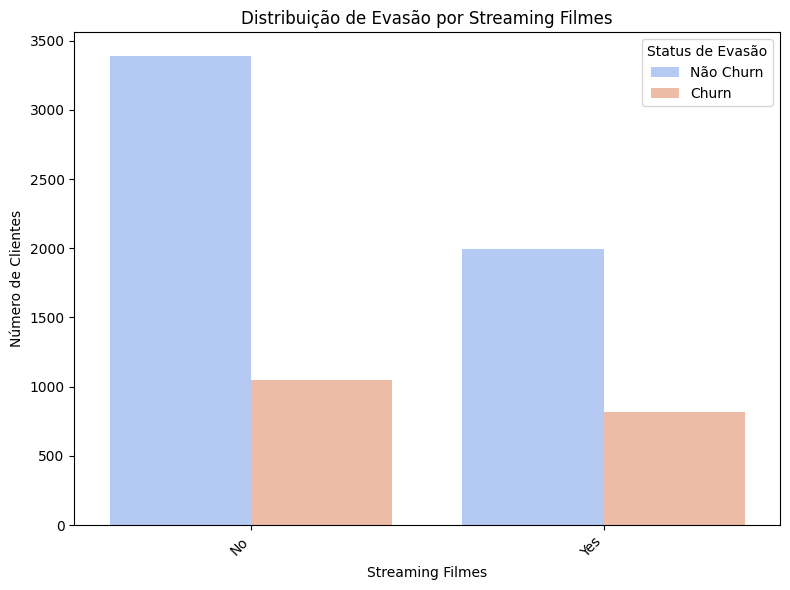

Observações para 'Streaming_Filmes':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Streaming_Filmes'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Contrato'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Contrato                                
Dois anos                  48       1685
Mensal                   1655       2350
Um ano                    166       1352

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Contrato                                
Dois anos                2.77      97.23
Mensal                  41.32      58.68
Um ano                  10.94      89.06


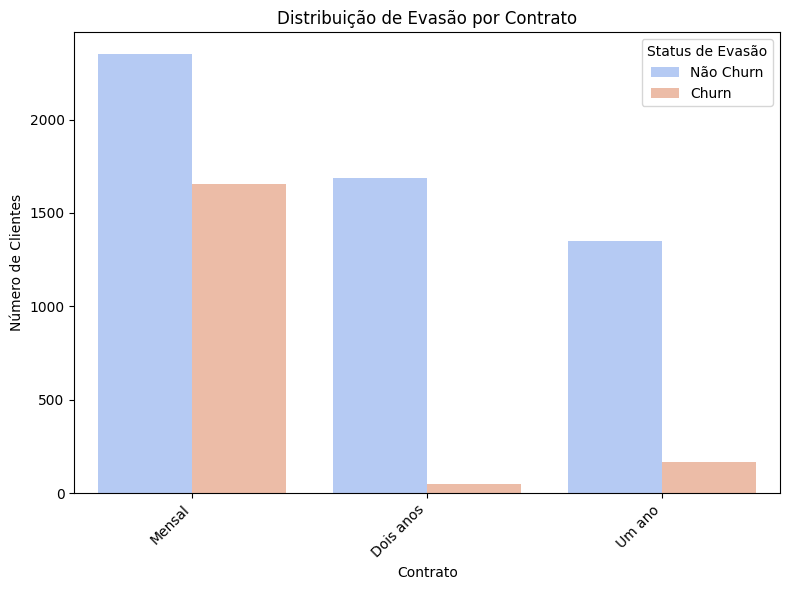

Observações para 'Contrato':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Contrato'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Fatura_Digital'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label  Churn  Não Churn
Fatura_Digital                          
0                         469       2479
1                        1400       2908

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label  Churn  Não Churn
Fatura_Digital                          
0                       15.91      84.09
1                       32.50      67.50


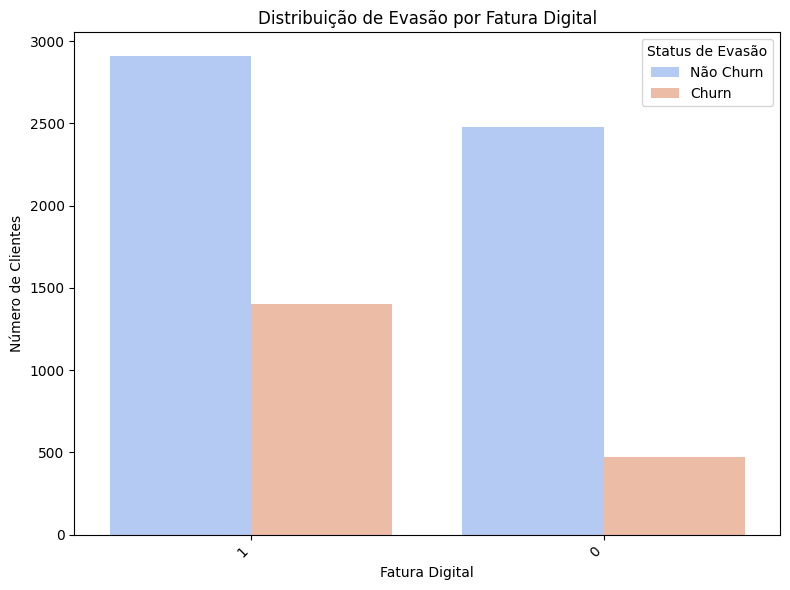

Observações para 'Fatura_Digital':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Fatura_Digital'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------

Análise para a variável: 'Metodo_Pagamento'

Tabela de Contagem Absoluta:
Exclusao_Cliente_Label               Churn  Não Churn
Metodo_Pagamento                                     
Cartão de crédito (automático)         232       1335
Cheque eletrônico                     1071       1374
Cheque enviado                         308       1349
Transferência bancária (automática)    258       1329

Tabela de Proporção (porcentagem de churn dentro de cada categoria):
Exclusao_Cliente_Label               Churn  Não Churn
Metodo_Pagamento                                     
Cartão de crédito (automático)       14.81      85.19
Cheque eletrônico                    43.80      56.20
Cheque enviado           

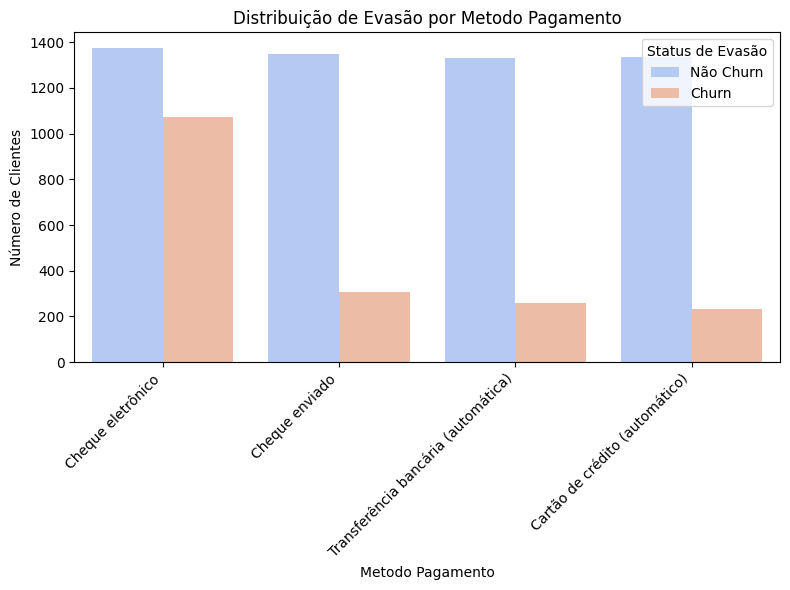

Observações para 'Metodo_Pagamento':
- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de 'Metodo_Pagamento'.
- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão
--------------------------------------------------


In [9]:
churn_labels = {0: 'Não Churn', 1: 'Churn'}
df_telecom['Exclusao_Cliente_Label'] = df_telecom['Exclusao_Cliente'].map(churn_labels)

colunas_categoricas = [
    'Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Servico_Telefone',
    'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online',
    'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
    'Streaming_TV', 'Streaming_Filmes', 'Contrato', 'Fatura_Digital',
    'Metodo_Pagamento'
]

for col in colunas_categoricas:
    if col in df_telecom.columns:
        print(f"\nAnálise para a variável: '{col}'")

        tabela_contagem = pd.crosstab(df_telecom[col], df_telecom['Exclusao_Cliente_Label'])
        print("\nTabela de Contagem Absoluta:")
        print(tabela_contagem)

        tabela_proporcao = pd.crosstab(df_telecom[col], df_telecom['Exclusao_Cliente_Label'], normalize='index') * 100
        print("\nTabela de Proporção (porcentagem de churn dentro de cada categoria):")
        print(tabela_proporcao.round(2))

        plt.figure(figsize=(8, 6))
        sns.countplot(data=df_telecom, x=col, hue='Exclusao_Cliente_Label', palette='coolwarm', order=df_telecom[col].value_counts().index)
        plt.title(f'Distribuição de Evasão por {col.replace("_", " ")}')
        plt.xlabel(col.replace("_", " "))
        plt.ylabel('Número de Clientes')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Status de Evasão')
        plt.tight_layout()
        plt.show()

        print(f"Observações para '{col}':")
        print(f"- A tabela de proporção mostra a % de 'Churn' e 'Não Churn' para cada categoria de '{col}'.")
        print(f"- O gráfico de barras visualiza a contagem de clientes em cada grupo, segmentado pelo status de evasão")
        print("-" * 50)

    else:
        print(f"Coluna '{col}' não encontrada para análise.")

### Contagem de evasão por variáveis numéricas


Análise para a variável numérica: 'Meses_Servico':


C:\Users\richa\AppData\Local\Temp\ipykernel_4864\1458246859.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exclusao_Cliente_Label', y=col, data=df_telecom, palette='pastel')


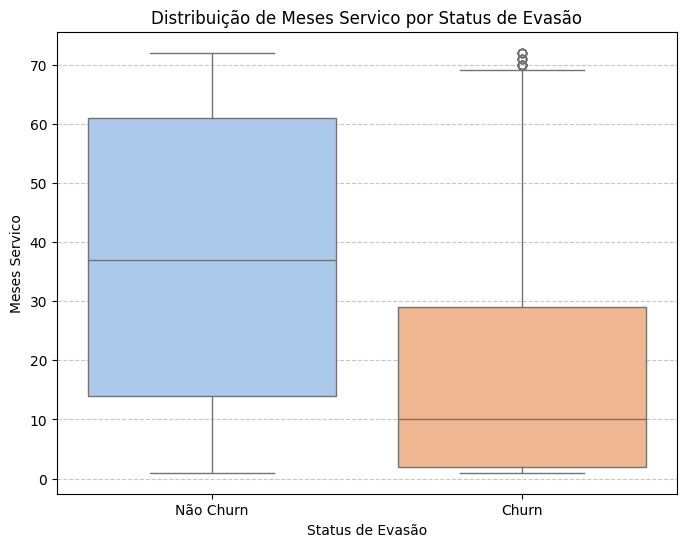

O Box Plot mostra a mediana, quartis e outliers de 'Meses_Servico' para cada grupo de evasão.


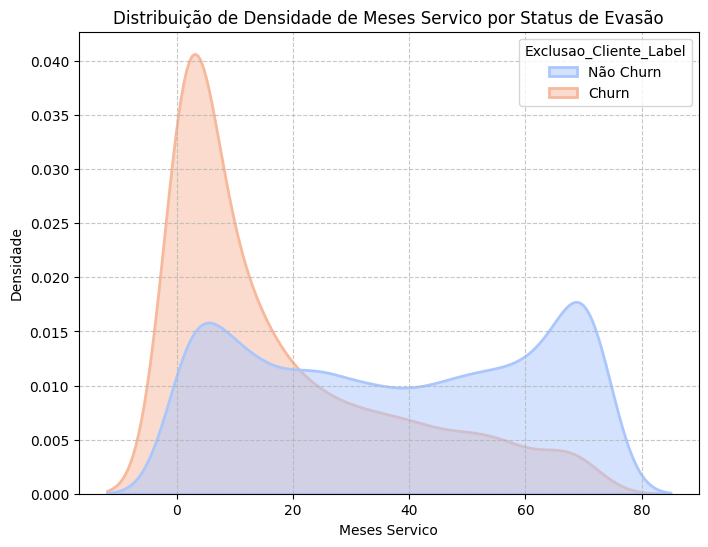

O KDE Plot mostra a forma da distribuição de 'Meses_Servico' para cada grupo de evasão.
--------------------------------------------------

Análise para a variável numérica: 'Custo_Mensal':


C:\Users\richa\AppData\Local\Temp\ipykernel_4864\1458246859.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exclusao_Cliente_Label', y=col, data=df_telecom, palette='pastel')


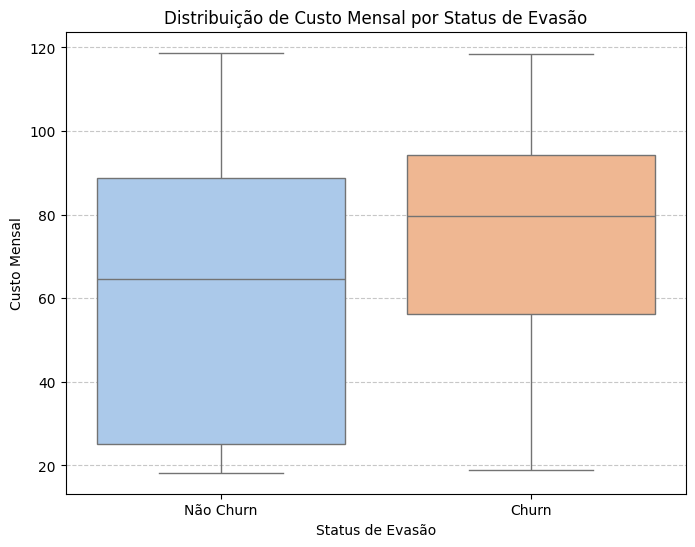

O Box Plot mostra a mediana, quartis e outliers de 'Custo_Mensal' para cada grupo de evasão.


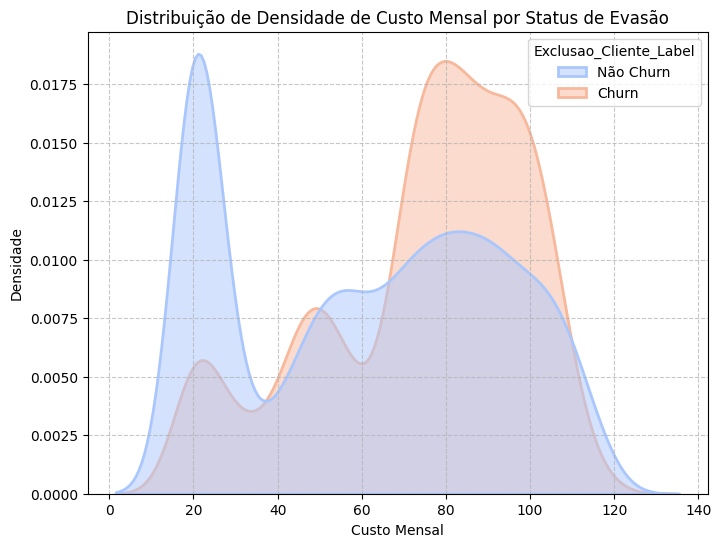

O KDE Plot mostra a forma da distribuição de 'Custo_Mensal' para cada grupo de evasão.
--------------------------------------------------

Análise para a variável numérica: 'Custo_Total':


C:\Users\richa\AppData\Local\Temp\ipykernel_4864\1458246859.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exclusao_Cliente_Label', y=col, data=df_telecom, palette='pastel')


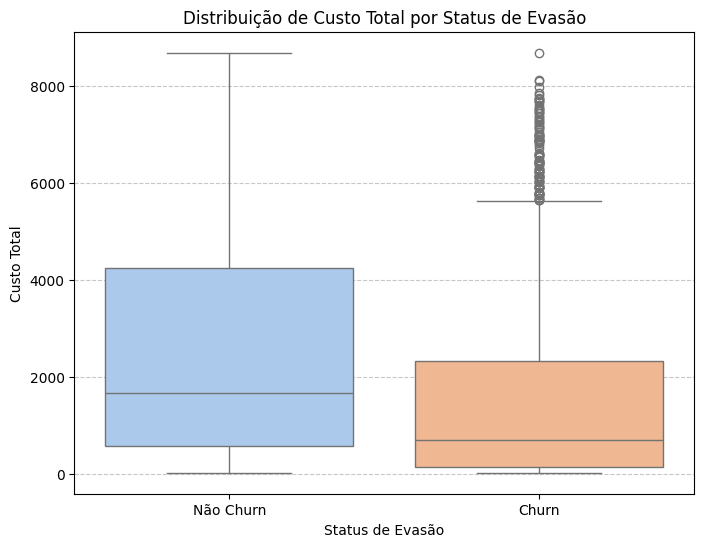

O Box Plot mostra a mediana, quartis e outliers de 'Custo_Total' para cada grupo de evasão.


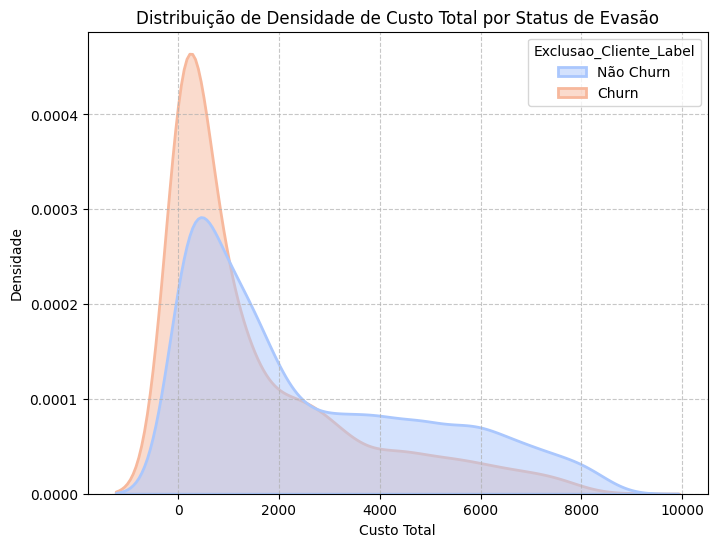

O KDE Plot mostra a forma da distribuição de 'Custo_Total' para cada grupo de evasão.
--------------------------------------------------

Análise para a variável numérica: 'Custo_Diario':


C:\Users\richa\AppData\Local\Temp\ipykernel_4864\1458246859.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exclusao_Cliente_Label', y=col, data=df_telecom, palette='pastel')


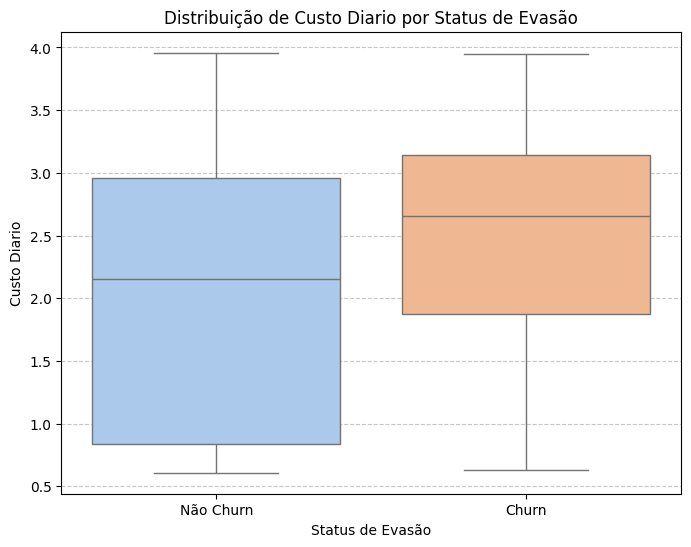

O Box Plot mostra a mediana, quartis e outliers de 'Custo_Diario' para cada grupo de evasão.


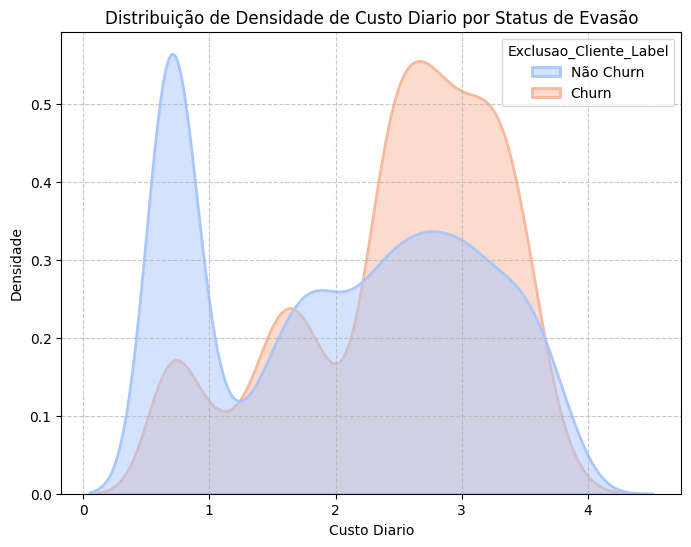

O KDE Plot mostra a forma da distribuição de 'Custo_Diario' para cada grupo de evasão.
--------------------------------------------------


In [10]:
if 'Exclusao_Cliente_Label' not in df_telecom.columns:
    churn_labels = {0: 'Não Churn', 1: 'Churn'}
    df_telecom['Exclusao_Cliente_Label'] = df_telecom['Exclusao_Cliente'].map(churn_labels)

colunas_numericas_para_analise = [
    'Meses_Servico',
    'Custo_Mensal',
    'Custo_Total',
    'Custo_Diario'
]

for col in colunas_numericas_para_analise:
    if col in df_telecom.columns:
        print(f"\nAnálise para a variável numérica: '{col}':")

        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Exclusao_Cliente_Label', y=col, data=df_telecom, palette='pastel')
        plt.title(f'Distribuição de {col.replace("_", " ")} por Status de Evasão')
        plt.xlabel('Status de Evasão')
        plt.ylabel(col.replace("_", " "))
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
        print(f"O Box Plot mostra a mediana, quartis e outliers de '{col}' para cada grupo de evasão.")

        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=df_telecom, x=col, hue='Exclusao_Cliente_Label', fill=True, common_norm=False, palette='coolwarm', alpha=0.5, linewidth=2)
        plt.title(f'Distribuição de Densidade de {col.replace("_", " ")} por Status de Evasão')
        plt.xlabel(col.replace("_", " "))
        plt.ylabel('Densidade')
        plt.grid(linestyle='--', alpha=0.7)
        plt.show()
        print(f"O KDE Plot mostra a forma da distribuição de '{col}' para cada grupo de evasão.")
        print("-" * 50)

    else:
        print(f"Coluna '{col}' não encontrada para análise")

### Análise de correlação entre variáveis


Convertendo colunas de serviço binárias para 0/1:
Coluna 'Multiplas_Linhas' convertida para 0/1. Novos valores únicos: [0 1]
Coluna 'Seguranca_Online' convertida para 0/1. Novos valores únicos: [0 1]
Coluna 'Backup_Online' convertida para 0/1. Novos valores únicos: [1 0]
Coluna 'Protecao_Dispositivo' convertida para 0/1. Novos valores únicos: [0 1]
Coluna 'Suporte_Tecnico' convertida para 0/1. Novos valores únicos: [1 0]
Coluna 'Streaming_TV' convertida para 0/1. Novos valores únicos: [1 0]
Coluna 'Streaming_Filmes' convertida para 0/1. Novos valores únicos: [0 1]

Calculando a Matriz de Correlação:

Gerando Heatmap da Matriz de Correlação:


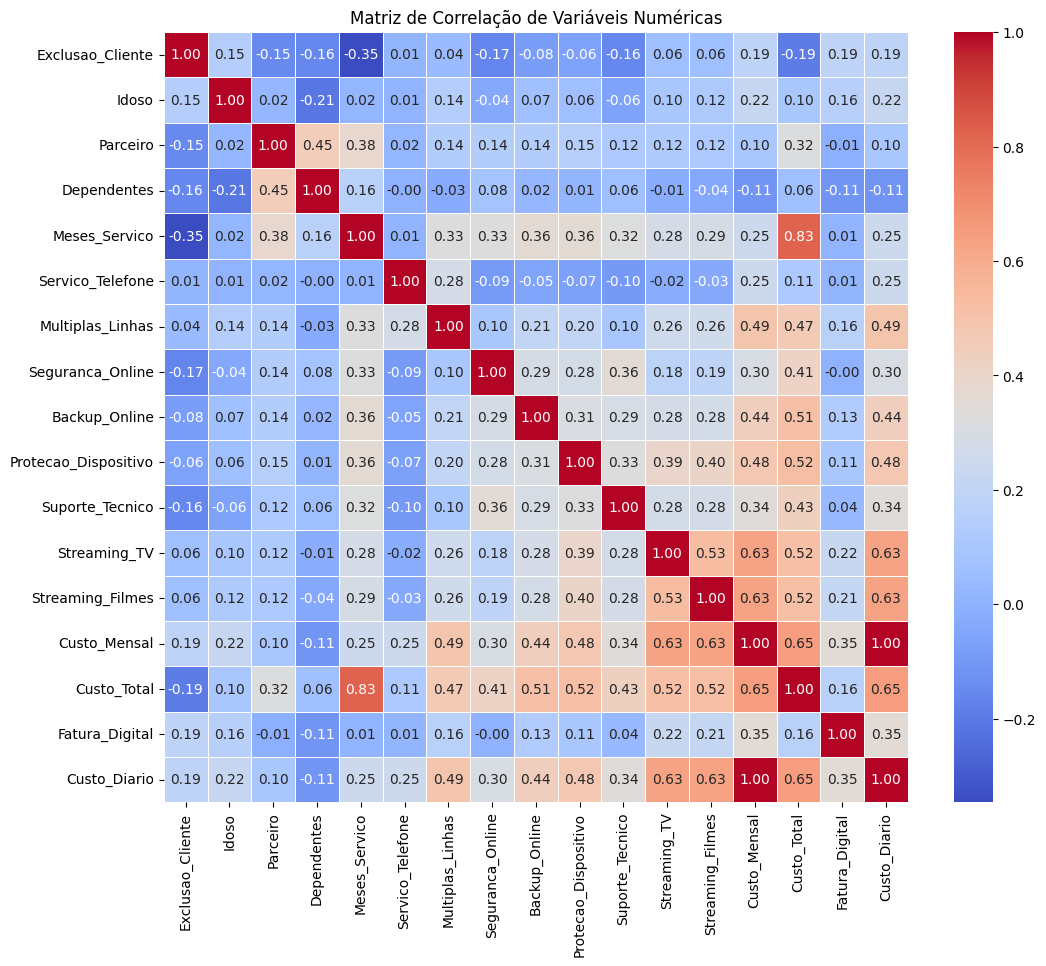


Correlações da 'Exclusao_Cliente' com Outras Variáveis Numéricas:
Exclusao_Cliente        1.000000
Custo_Diario            0.189393
Custo_Mensal            0.189393
Fatura_Digital          0.186309
Idoso                   0.146400
Streaming_TV            0.062456
Streaming_Filmes        0.060092
Multiplas_Linhas        0.039277
Servico_Telefone        0.012337
Protecao_Dispositivo   -0.063479
Backup_Online          -0.080211
Parceiro               -0.148106
Dependentes            -0.160347
Suporte_Tecnico        -0.160476
Seguranca_Online       -0.166865
Custo_Total            -0.194440
Meses_Servico          -0.345799
Name: Exclusao_Cliente, dtype: float64

Criando a variável 'Total_Servicos_Contratados':
Coluna 'Total_Servicos_Contratados' criada. Exemplo: 0    4
1    3
2    2
3    5
4    3
Name: Total_Servicos_Contratados, dtype: int64
Valores únicos: [4 3 2 5 7 8 1 6 0]
Correlação de 'Total_Servicos_Contratados' com 'Exclusao_Cliente': -0.06

Análise da Distribuição de 'Total_Serv

C:\Users\richa\AppData\Local\Temp\ipykernel_4864\3086727327.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exclusao_Cliente_Label', y='Total_Servicos_Contratados', data=df_telecom, palette='YlGnBu')


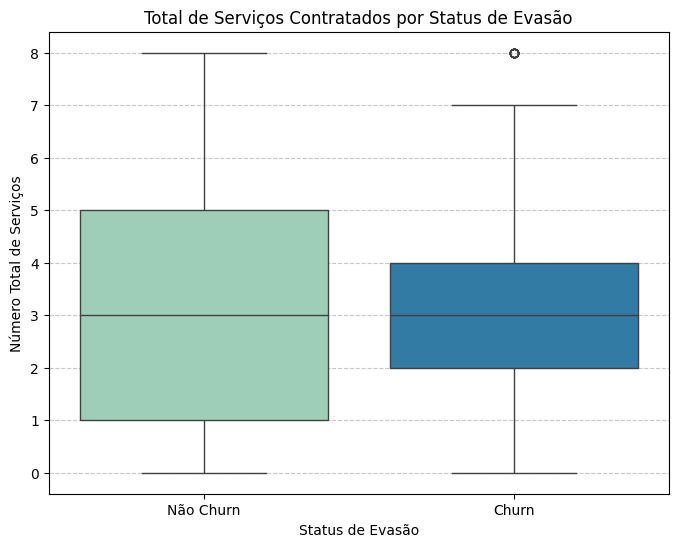

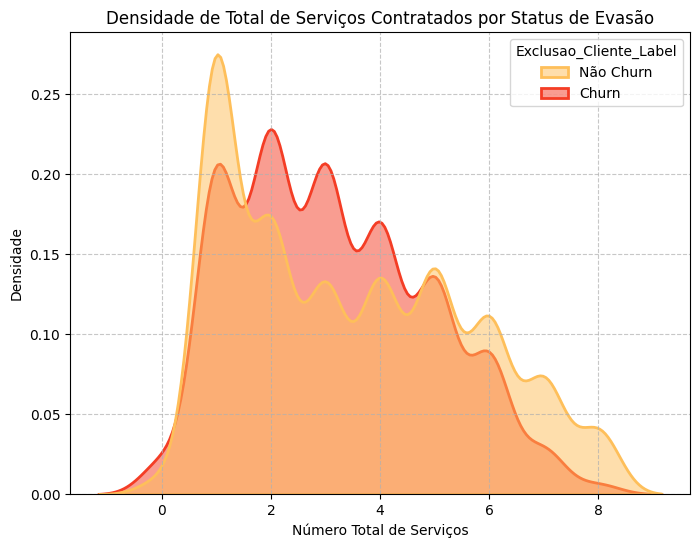


--- Análise da Distribuição de 'Custo_Diario' por Churn ---


C:\Users\richa\AppData\Local\Temp\ipykernel_4864\3086727327.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exclusao_Cliente_Label', y='Custo_Diario', data=df_telecom, palette='PuOr')


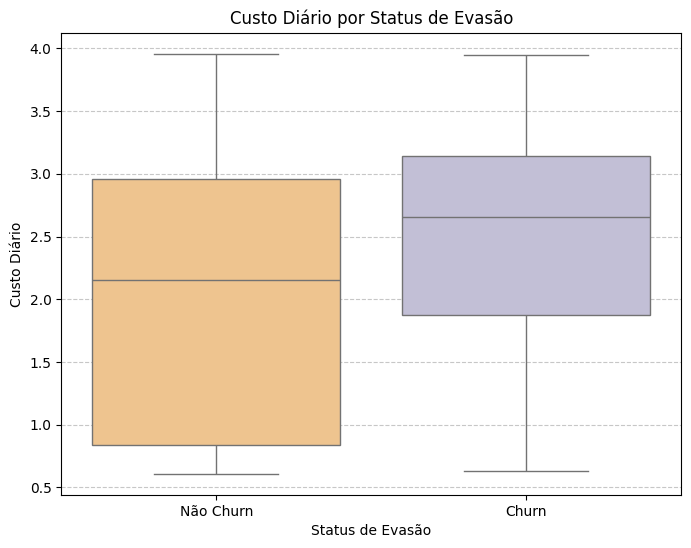

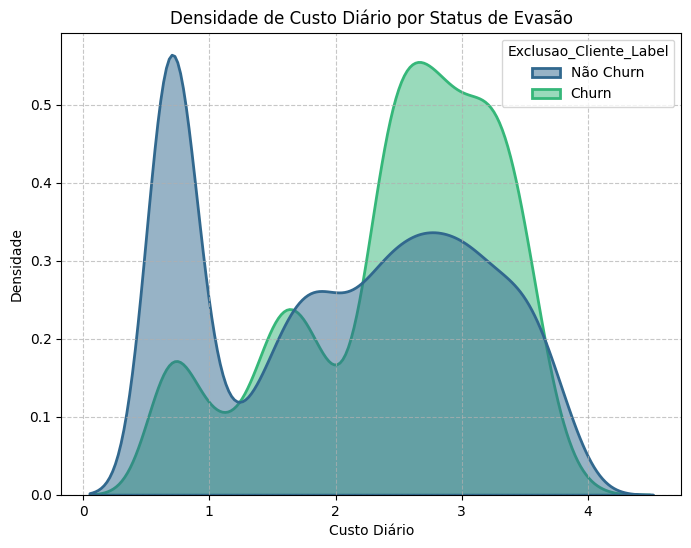

In [11]:
if 'Exclusao_Cliente_Label' not in df_telecom.columns:
    churn_labels = {0: 'Não Churn', 1: 'Churn'}
    df_telecom['Exclusao_Cliente_Label'] = df_telecom['Exclusao_Cliente'].map(churn_labels)

print("\nConvertendo colunas de serviço binárias para 0/1:")
service_cols_to_convert_to_binary = [
    'Multiplas_Linhas', 'Seguranca_Online', 'Backup_Online',
    'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes'
]

mapeamento_sim_nao = {'Yes': 1, 'No': 0}

for col in service_cols_to_convert_to_binary:
    if col in df_telecom.columns and df_telecom[col].dtype == 'object' and all(val in ['Yes', 'No'] for val in df_telecom[col].unique()):
        df_telecom[col] = df_telecom[col].map(mapeamento_sim_nao).astype(int)
        print(f"Coluna '{col}' convertida para 0/1. Novos valores únicos: {df_telecom[col].unique()}")
    else:
        print(f"Coluna '{col}' já é numérica, contém outros valores, ou não encontrada. Tipo: {df_telecom[col].dtype if col in df_telecom.columns else 'Não encontrada'}")

print("\nCalculando a Matriz de Correlação:")
df_numerico = df_telecom.select_dtypes(include=[np.number])
correlation_matrix = df_numerico.corr()

print("\nGerando Heatmap da Matriz de Correlação:")
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação de Variáveis Numéricas')
plt.show()

print("\nCorrelações da 'Exclusao_Cliente' com Outras Variáveis Numéricas:")
churn_correlations = correlation_matrix['Exclusao_Cliente'].sort_values(ascending=False)
print(churn_correlations)

print("\nCriando a variável 'Total_Servicos_Contratados':")
service_features = [
    'Servico_Telefone', 'Multiplas_Linhas', 'Seguranca_Online',
    'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
    'Streaming_TV', 'Streaming_Filmes',
]

existing_service_features = [f for f in service_features if f in df_telecom.columns]
if existing_service_features:
    df_telecom['Total_Servicos_Contratados'] = df_telecom[existing_service_features].sum(axis=1)
    print(f"Coluna 'Total_Servicos_Contratados' criada. Exemplo: {df_telecom['Total_Servicos_Contratados'].head()}")
    print(f"Valores únicos: {df_telecom['Total_Servicos_Contratados'].unique()}")
    print(f"Correlação de 'Total_Servicos_Contratados' com 'Exclusao_Cliente': {df_telecom['Total_Servicos_Contratados'].corr(df_telecom['Exclusao_Cliente']):.2f}")

    print("\nAnálise da Distribuição de 'Total_Servicos_Contratados' por Churn:")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exclusao_Cliente_Label', y='Total_Servicos_Contratados', data=df_telecom, palette='YlGnBu')
    plt.title('Total de Serviços Contratados por Status de Evasão')
    plt.xlabel('Status de Evasão')
    plt.ylabel('Número Total de Serviços')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df_telecom, x='Total_Servicos_Contratados', hue='Exclusao_Cliente_Label', fill=True, common_norm=False, palette='YlOrRd', alpha=0.5, linewidth=2)
    plt.title('Densidade de Total de Serviços Contratados por Status de Evasão')
    plt.xlabel('Número Total de Serviços')
    plt.ylabel('Densidade')
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Não foi possível criar 'Total_Servicos_Contratados' pois as colunas de serviço não foram encontradas.")

if 'Custo_Diario' in df_telecom.columns:
    print("\n--- Análise da Distribuição de 'Custo_Diario' por Churn ---")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exclusao_Cliente_Label', y='Custo_Diario', data=df_telecom, palette='PuOr')
    plt.title('Custo Diário por Status de Evasão')
    plt.xlabel('Status de Evasão')
    plt.ylabel('Custo Diário')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df_telecom, x='Custo_Diario', hue='Exclusao_Cliente_Label', fill=True, common_norm=False, palette='viridis', alpha=0.5, linewidth=2)
    plt.title('Densidade de Custo Diário por Status de Evasão')
    plt.xlabel('Custo Diário')
    plt.ylabel('Densidade')
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Coluna 'Custo_Diario' não encontrada para análise.")